importing libraries


In [1]:
import numpy as np
import pandas as pd


Importing dataset


In [2]:
df =pd.read_csv("/content/drive/MyDrive/Mymainproject/weatherAUS.csv")
X = df.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].values
Y = df.iloc[:,-1].values

In [3]:
df_selected = df.iloc[:, [1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,23]]
df_selected.head(10)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,Albury,14.3,25.0,0.0,W,50.0,SW,W,20.0,24.0,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,Albury,9.7,31.9,0.0,NNW,80.0,SE,NW,7.0,28.0,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,Albury,13.1,30.1,1.4,W,28.0,S,SSE,15.0,11.0,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [4]:
print(X)

[['Albury' 13.4 22.9 ... 21.8 'No' 0.0]
 ['Albury' 7.4 25.1 ... 24.3 'No' 0.0]
 ['Albury' 12.9 25.7 ... 23.2 'No' 0.0]
 ...
 ['Uluru' 3.6 25.3 ... 24.5 'No' 0.0]
 ['Uluru' 5.4 26.9 ... 26.1 'No' 0.0]
 ['Uluru' 7.8 27.0 ... 26.0 'No' 0.0]]


In [5]:
print(Y)

['No' 'No' 'No' ... 'No' 'No' 'No']


Data exploration


In [6]:
df.shape

(142193, 24)

In [7]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   WindGustDir    132863 non-null  object 
 5   WindGustSpeed  132923 non-null  float64
 6   WindDir9am     132180 non-null  object 
 7   WindDir3pm     138415 non-null  object 
 8   WindSpeed9am   140845 non-null  float64
 9   WindSpeed3pm   139563 non-null  float64
 10  Humidity9am    140419 non-null  float64
 11  Humidity3pm    138583 non-null  float64
 12  Pressure9am    128179 non-null  float64
 13  Pressure3pm    128212 non-null  float64
 14  Cloud9am       88536 non-null   float64
 15  Cloud3pm       85099 non-null   float64
 16  Temp9am        141289 non-null  float64
 17  Temp3pm        139467 non-nul

Text(0.5, 1.0, 'type of our data ')

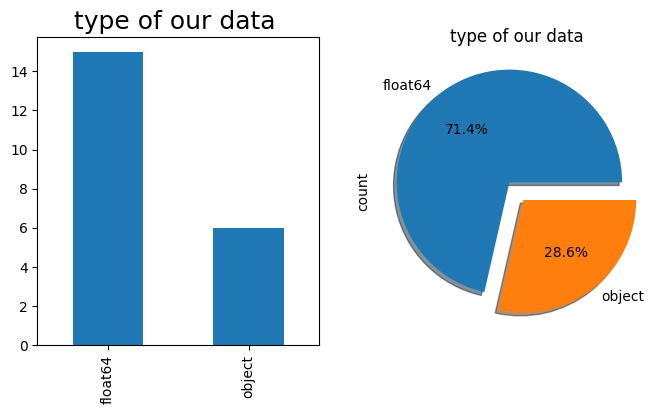

In [8]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(1, 2, figsize=(8, 4))


df_selected.dtypes.value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True, ax=axarr[1])
axarr[1].set_title("Type of our data", fontsize=18)


df_selected.dtypes.value_counts().plot(kind='bar',ax=axarr[0])
plt.title('type of our data');
axarr[0].set_title("type of our data ", fontsize=18)

In [9]:
# Replace 'Yes' and 'No' with 1 and 0 in RainToday and RainTomorrow columns
df_selected.loc[:, 'RainToday'] = df_selected['RainToday'].map({'No': 0, 'Yes': 1})
df_selected.loc[:, 'RainTomorrow'] = df_selected['RainTomorrow'].map({'No': 0, 'Yes': 1})


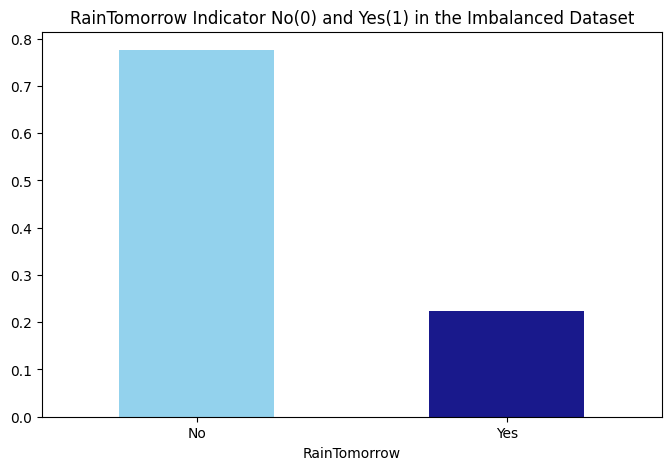

In [10]:
import matplotlib.pyplot as plt

full_data = pd.read_csv('/content/drive/MyDrive/Mymainproject/weatherAUS.csv')

fig = plt.figure(figsize = (8,5))
full_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

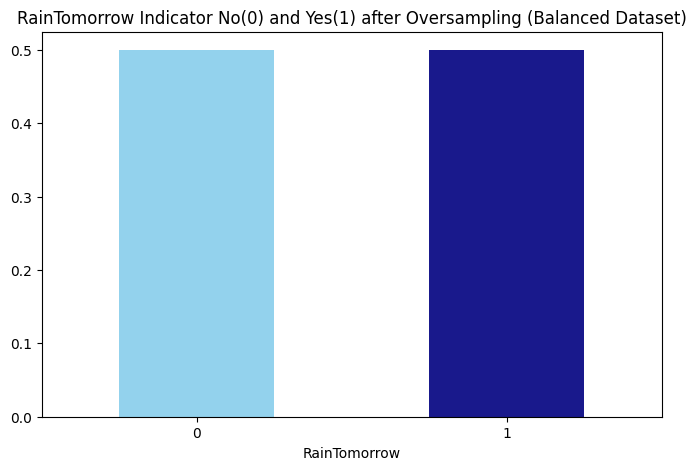

In [11]:
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Split the dataset into two groups
no = df_selected[df_selected['RainTomorrow'] == 0]
yes = df_selected[df_selected['RainTomorrow'] == 1]

yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

    # Plot the balanced dataset
fig = plt.figure(figsize=(8, 5))
oversampled['RainTomorrow'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'navy'], alpha=0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()


In [12]:
# create a table with data missing
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing ,
     'data type' : df.dtypes
}
frame=pd.DataFrame(value)
frame


,missing_values,percent_missing %,data type
Date,0,0.000000,object
Location,0,0.000000,object
MinTemp,637,0.447983,float64
MaxTemp,322,0.226453,float64
Rainfall,1406,0.988797,float64
Evaporation,60843,42.789026,float64
Sunshine,67816,47.692924,float64
WindGustDir,9330,6.561504,object
WindGustSpeed,9270,6.519308,float64
WindDir9am,10013,7.041838,object


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Missing values per column:
Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


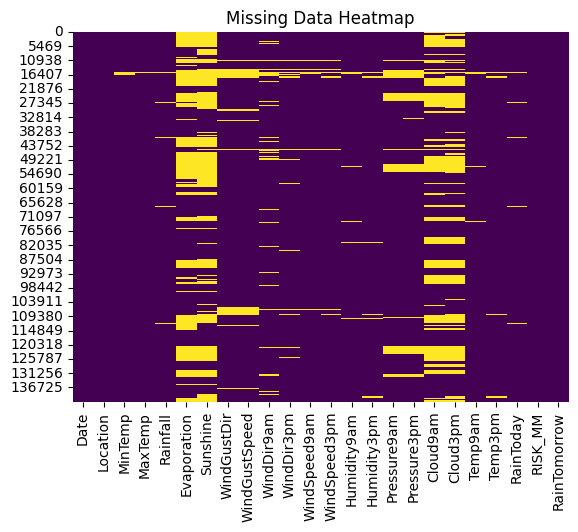

In [13]:
# Step 1: Check for missing data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display the total missing values per column
print("Missing values per column:")
df_selected = pd.read_csv('/content/drive/MyDrive/Mymainproject/weatherAUS.csv')
print(df_selected.isnull().sum())

# Visualize missing data with a heatmap
sns.heatmap(df_selected.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [14]:
# Step 2: Handle missing data

# Numerical columns: Fill missing values with the mean
numerical_cols = df_selected.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    df_selected[col] = df_selected[col].fillna(df_selected[col].mean())  # Explicit assignment instead of inplace=True

# Categorical columns: Fill missing values with the mode
categorical_cols = df_selected.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_selected[col] = df_selected[col].fillna(df_selected[col].mode()[0])  # Explicit assignment instead of inplace=True

# Confirm no missing values remain
print("Missing values after handling:")
print(df_selected.isnull().sum())


Missing values after handling:
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


In [15]:
print(df_selected.head(10))

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6     5.469824  7.624853   
1  2008-12-02   Albury      7.4     25.1       0.0     5.469824  7.624853   
2  2008-12-03   Albury     12.9     25.7       0.0     5.469824  7.624853   
3  2008-12-04   Albury      9.2     28.0       0.0     5.469824  7.624853   
4  2008-12-05   Albury     17.5     32.3       1.0     5.469824  7.624853   
5  2008-12-06   Albury     14.6     29.7       0.2     5.469824  7.624853   
6  2008-12-07   Albury     14.3     25.0       0.0     5.469824  7.624853   
7  2008-12-08   Albury      7.7     26.7       0.0     5.469824  7.624853   
8  2008-12-09   Albury      9.7     31.9       0.0     5.469824  7.624853   
9  2008-12-10   Albury     13.1     30.1       1.4     5.469824  7.624853   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1     

In [16]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df_selected.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_selected.loc[:, col] = le.fit_transform(df_selected[col])  # Use .loc for assignment
    label_encoders[col] = le

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = df_selected.select_dtypes(include=['float64', 'int64']).columns

# Use .loc for assignment
df_selected.loc[:, numerical_cols] = scaler.fit_transform(df_selected[numerical_cols])

In [18]:
print(df_selected.head(10))

  Date Location   MinTemp   MaxTemp  Rainfall  Evaporation      Sunshine  \
0  396        2  0.189954 -0.045964 -0.207757          0.0 -6.495101e-16   
1  397        2 -0.749174  0.263480 -0.278989          0.0 -6.495101e-16   
2  398        2  0.111694  0.347873 -0.278989          0.0 -6.495101e-16   
3  399        2 -0.467436  0.671383 -0.278989          0.0 -6.495101e-16   
4  400        2  0.831692  1.276205 -0.160269          0.0 -6.495101e-16   
5  401        2  0.377780  0.910498 -0.255245          0.0 -6.495101e-16   
6  402        2  0.330824  0.249414 -0.278989          0.0 -6.495101e-16   
7  403        2 -0.702218  0.488530 -0.278989          0.0 -6.495101e-16   
8  404        2 -0.389175  1.219942 -0.278989          0.0 -6.495101e-16   
9  405        2  0.142998  0.966761 -0.112781          0.0 -6.495101e-16   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0          13       0.305648         13  ...   -1.435935    -1.475456   
1          14    

In [19]:
from sklearn.model_selection import train_test_split

X = df_selected.drop('RainTomorrow', axis=1)
y = df_selected['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(y_train.dtypes)  # Check data type of y_train
y_train = y_train.astype('int')

object


In [21]:
print(y_train.dtypes)  # Should now show int
print(y_train.unique())  # Should only show [0, 1]

int64
[0 1]


In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)

In [32]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Encode categorical target variable
le = LabelEncoder()
Y_encoded = le.fit_transform(Y)

# Handle missing values
df_selected.fillna(df_selected.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=42)

# 1️⃣ Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(Y_test, rf_pred))

# 2️⃣ Train SVM Classifier
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(Y_test, svm_pred))

# 3️⃣ Train LSTM Model
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])


lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, Y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, Y_test))

# Evaluate LSTM Model
lstm_pred = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32").flatten()
print("LSTM Accuracy:", accuracy_score(Y_test, lstm_pred))


Random Forest Accuracy: 1.0
SVM Accuracy: 0.9857238299518267
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3555/3555 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.9139 - loss: 0.2181 - val_accuracy: 0.9942 - val_loss: 0.0232
Epoch 2/10
3555/3555 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.9881 - loss: 0.0300 - val_accuracy: 0.9956 - val_loss: 0.0140
Epoch 3/10
3555/3555 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9924 - loss: 0.0206 - val_accuracy: 0.9992 - val_loss: 0.0150
Epoch 4/10
3555/3555 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.9942 - loss: 0.0161 - val_accuracy: 0.9939 - val_loss: 0.0116
Epoch 5/10
3555/3555 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.9946 - loss: 0.0143 - val_accuracy: 0.9990 - val_loss: 0.0077
Epoch 6/10
3555/3555 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9957 - loss: 0.0125 - val_accuracy: 0.9986 - val_loss: 0.0078
Epoch 7/10
3555/3555 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.9966 - loss: 0.0105 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 8/10
3555/3555 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9970 - loss: 0.0101 - val

In [30]:
# # Import necessary libraries
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping

# # Handle missing values properly
# df_selected = df_selected.infer_objects(copy=False)  # Fix dtype issue
# df_selected.fillna(df_selected.mean(numeric_only=True), inplace=True)

# # Encode categorical target variable
# le = LabelEncoder()
# Y_encoded = le.fit_transform(Y)

# # Train-test split (before scaling, to prevent data leakage)
# X_train, X_test, Y_train, Y_test = train_test_split(df_selected, Y_encoded, test_size=0.2,
#                                                     stratify=Y_encoded, random_state=42)

# # Feature scaling (fit only on training data to avoid leakage)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # 1️⃣ Train Random Forest Classifier (limit depth to reduce overfitting)
# rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# rf_model.fit(X_train_scaled, Y_train)
# rf_pred = rf_model.predict(X_test_scaled)
# print("Random Forest Accuracy:", accuracy_score(Y_test, rf_pred))

# # 2️⃣ Train SVM Classifier
# svm_model = SVC(kernel='rbf')
# svm_model.fit(X_train_scaled, Y_train)
# svm_pred = svm_model.predict(X_test_scaled)
# print("SVM Accuracy:", accuracy_score(Y_test, svm_pred))

# # 3️⃣ Train LSTM Model (add dropout layers to prevent overfitting)
# X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
# X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# lstm_model = Sequential([
#     LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
#     Dropout(0.2),  # Dropout to reduce overfitting
#     LSTM(30, activation='relu'),
#     Dropout(0.2),
#     Dense(1, activation='sigmoid')
# ])

# lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Use early stopping to avoid overtraining
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Train LSTM Model
# lstm_model.fit(X_train_lstm, Y_train, epochs=20, batch_size=32,
#                validation_data=(X_test_lstm, Y_test), callbacks=[early_stopping])

# # Evaluate LSTM Model
# lstm_pred = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32").flatten()
# print("LSTM Accuracy:", accuracy_score(Y_test, lstm_pred))


In [29]:
# print("Train set shape:", X_train.shape, Y_train.shape)
# print("Test set shape:", X_test.shape, Y_test.shape)

# # Check for duplicate samples between train and test
# train_samples = set(map(tuple, X_train))
# test_samples = set(map(tuple, X_test))
# intersection = train_samples.intersection(test_samples)

# print(f"Number of overlapping samples in train and test: {len(intersection)}")


In [28]:
# from sklearn.model_selection import train_test_split
# import pandas as pd

# # Convert to DataFrame for better handling
# df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
# df['target'] = Y

# # Shuffle the data and re-split
# df = df.sample(frac=1, random_state=42).drop_duplicates()  # Remove duplicate rows
# X_new = df.drop(columns=['target'])
# Y_new = df['target']

# # Re-split without leakage
# X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=42, stratify=Y_new)

# # Verify again
# train_samples = set(map(tuple, X_train.values))
# test_samples = set(map(tuple, X_test.values))
# intersection = train_samples.intersection(test_samples)

# print(f"Fixed Overlapping Samples: {len(intersection)}")  # Should print 0


In [33]:
# overlap = set(X_train.index) & set(X_test.index)
# print("Overlapping samples in train and test:", len(overlap))



AttributeError: 'numpy.ndarray' object has no attribute 'index'